# Lesson 05 - Generating Additional Features
Austin Derrow-Pinion CM208

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/height_weight_10.csv')
df.head()

,height,weight
0,67.17704,127.8719
1,67.06687,123.2179
2,72.42515,129.0739
3,68.80719,142.8541
4,69.20003,131.5186


#### Part (1): Generate an additional input feature equal to (height)^2

In [3]:
df['height^2'] = df.height.values ** 2
df.head()

,height,weight,height^2
0,67.17704,127.8719,4512.754703
1,67.06687,123.2179,4497.965052
2,72.42515,129.0739,5245.402353
3,68.80719,142.8541,4734.429396
4,69.20003,131.5186,4788.644152


#### Part (2): Standardize the data

In [4]:
# define raw data
features = np.array([df.height.values, df['height^2'].values]).transpose().reshape((10, 2)).astype(np.float64)
weight = df.weight.values.astype(np.float64)

# standardize data
features_s = scale(features)
weight_s = scale(weight)
print(features_s.mean())
print(weight_s.mean())

2.64649413495e-15
-9.32587340685e-16


#### Part (3): Use TensorFlow to compute the best fit plane to the data set

In [5]:
# Tensorflow

# y = w*x + b
x = tf.constant(features_s, dtype='float32', shape=[10, 2])
y = tf.constant(weight_s, dtype='float32', shape=[10, 1])
w = tf.Variable(tf.truncated_normal([2, 1], stddev=1))
b = tf.Variable(0.0)

# error loss function
MSE = tf.reduce_mean(tf.square(tf.matmul(x, w) + b - y))

# define optimizer
STEPSIZE = 0.4
optimizer = tf.train.GradientDescentOptimizer(STEPSIZE).minimize(MSE)

# prediction with current weights
y_pred = tf.matmul(x, w) + b

# init all variables
init = tf.initialize_all_variables()

In [6]:
sess = tf.Session()
sess.run(init)

In [7]:
MAXSTEPS = 20000
for step in range(MAXSTEPS + 1):
    (_, mse, w0, b0) = sess.run([optimizer, MSE, w, b])
    if (step % 1000) == 0:
        print('step = %-5d MSE = %-10f' % (step, mse))
print('done!')

step = 0     MSE = 1.174884  
step = 1000  MSE = 0.503091  
step = 2000  MSE = 0.455835  
step = 3000  MSE = 0.417464  
step = 4000  MSE = 0.386308  
step = 5000  MSE = 0.361011  
step = 6000  MSE = 0.340469  
step = 7000  MSE = 0.323791  
step = 8000  MSE = 0.310249  
step = 9000  MSE = 0.299253  
step = 10000 MSE = 0.290324  
step = 11000 MSE = 0.283075  
step = 12000 MSE = 0.277188  
step = 13000 MSE = 0.272409  
step = 14000 MSE = 0.268528  
step = 15000 MSE = 0.265377  
step = 16000 MSE = 0.262818  
step = 17000 MSE = 0.260740  
step = 18000 MSE = 0.259054  
step = 19000 MSE = 0.257684  
step = 20000 MSE = 0.256572  
done!


In [9]:
print("The best fit plane:")
print("y = %0.3f * height + %0.3f * (height^2) + %0.3f" % (w0[0], w0[1], b0))

The best fit plane:
y = 32.339 * height + -31.703 * (height^2) + -0.000


#### Part (4): Use TensorFlow and the best fit plane to predict standardized weights

In [10]:
pred_s = sess.run(y_pred)
print(pred_s)

[[-0.20090595]
 [-0.28930488]
 [ 0.5482024 ]
 [ 0.75786579]
 [ 0.89107883]
 [ 0.97134197]
 [-0.64896786]
 [-0.74102795]
 [-1.68857586]
 [ 0.40030196]]


#### Part (5): Unstandardize the predicted weights

In [17]:
pred = pred_s * weight.std() + weight.mean()
print(pred)

w1 = w0 / weight.std()
b1 = (b0 - weight.mean()) / weight.std()
print("Unstandardized equation:")
print("y = %0.3f * height - %0.3f * (height^2) - %0.3f" % (w1[0], -1 * w1[1], b1 * -1))

[[ 123.28104401]
 [ 122.31077576]
 [ 131.50326538]
 [ 133.80453491]
 [ 135.26667786]
 [ 136.14764404]
 [ 118.3631134 ]
 [ 117.35266113]
 [ 106.95236206]
 [ 129.87991333]]
Unstandardized equation:
y = 2.946 * height - 2.888 * (height^2) - 11.433


#### Part (6): Plot predicted and actual weights on the same plot

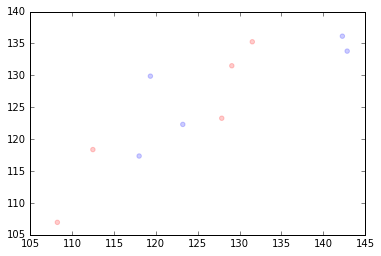

In [18]:
plt.scatter(weight, pred, alpha=0.2, color=['red', 'blue'])

#### Part (7): Compute MSE

In [19]:
mse = ((weight - pred.flatten()) ** 2).mean()
print('MSE = ', mse)
print('RMSE = ', np.sqrt(mse))

MSE =  30.9098387565
RMSE =  5.55966174839
